In [1]:
import os
os.getcwd()

'D:\\Data_Science\\Week 2 Day 3\\Predicting House Prices'

In [4]:
import pandas as pd
import numpy as np
HouseP=pd.read_csv("D:\\Data_Science\\Week 2 Day 3\\Predicting House Prices\\House_Prices.csv",sep=',')

In [5]:
HouseP.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramDa

In [7]:
import sklearn as sk
import statsmodels as sm
import scipy.stats as stat

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
HouseP.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [13]:
numeric_var_names=[key for key in dict(HouseP.dtypes) if dict(HouseP.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(HouseP.dtypes) if dict(HouseP.dtypes)[key] in ['object', 'O']]

In [15]:
print(numeric_var_names)
print(cat_var_names)

['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']
['Brick', 'Neighborhood']


In [17]:
House_Price_num=HouseP[numeric_var_names]
House_Price_num.head(5)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,1,114300,1790,2,2,2
1,2,114200,2030,4,2,3
2,3,114800,1740,3,2,1
3,4,94700,1980,3,2,3
4,5,119800,2130,3,3,3


In [18]:
House_Price_cat=HouseP[cat_var_names]
House_Price_cat.head(5)

,Brick,Neighborhood
0,No,East
1,No,East
2,No,East
3,No,East
4,No,East


In [19]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [20]:
num_summary=House_Price_num.apply(var_summary)

In [22]:
num_summary.to_csv('House_summary.csv')

In [23]:
output = pandas_profiling.ProfileReport(HouseP)

In [24]:
output

Number of variables,8
Number of observations,128
Total Missing (%),0.0%
Total size in memory,8.1 KiB
Average record size in memory,64.6 B
Numeric,6
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [25]:
num_summary=House_Price_num.apply(var_summary).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Home,128.0,0.0,8256.0,64.500000,64.5,37.094474,1.376000e+03,0.575108,1.0,2.27,7.35,13.7,32.75,64.5,96.25,115.3,121.65,126.73,128.0
Price,128.0,0.0,16694700.0,130427.343750,125950.0,26868.770371,7.219308e+08,0.206006,69100.0,81570.00,91310.00,102020.0,111325.00,125950.0,148250.00,166560.0,179465.00,196476.00,211200.0
SqFt,128.0,0.0,256120.0,2000.937500,2000.0,211.572431,4.476289e+04,0.105737,1450.0,1530.80,1664.00,1720.0,1880.00,2000.0,2140.00,2250.0,2368.00,2505.70,2590.0
Bedrooms,128.0,0.0,387.0,3.023438,3.0,0.725951,5.270054e-01,0.240108,2.0,2.00,2.00,2.0,3.00,3.0,3.00,4.0,4.00,4.73,5.0
Bathrooms,128.0,0.0,313.0,2.445312,2.0,0.514492,2.647023e-01,0.210399,2.0,2.00,2.00,2.0,2.00,2.0,3.00,3.0,3.00,3.00,4.0
Offers,128.0,0.0,330.0,2.578125,3.0,1.069324,1.143455e+00,0.414768,1.0,1.00,1.00,1.0,2.00,3.0,3.00,4.0,4.00,5.00,6.0


In [26]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

House_Price_num=House_Price_num.apply(outlier_capping)

In [27]:
num_summary=House_Price_num.apply(var_summary).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Home,128.0,0.0,8256.00,64.500000,64.5,37.053408,1.372955e+03,0.574471,2.27,2.4671,7.35,13.7,32.75,64.5,96.25,115.3,121.65,126.5329,126.73
Price,128.0,0.0,16689692.00,130388.218750,125950.0,26280.461229,6.906626e+08,0.201555,81570.00,81767.1000,91310.00,102020.0,111325.00,125950.0,148250.00,166560.0,179465.00,194268.4800,196476.00
SqFt,128.0,0.0,256103.00,2000.804688,2000.0,207.625863,4.310850e+04,0.103771,1530.80,1538.6840,1664.00,1720.0,1880.00,2000.0,2140.00,2250.0,2368.00,2487.9610,2505.70
Bedrooms,128.0,0.0,386.46,3.019219,3.0,0.715071,5.113269e-01,0.236840,2.00,2.0000,2.00,2.0,3.00,3.0,3.00,4.0,4.00,4.5329,4.73
Bathrooms,128.0,0.0,312.00,2.437500,2.0,0.498028,2.480315e-01,0.204319,2.00,2.0000,2.00,2.0,2.00,2.0,3.00,3.0,3.00,3.0000,3.00
Offers,128.0,0.0,329.00,2.570312,3.0,1.047559,1.097379e+00,0.407561,1.00,1.0000,1.00,1.0,2.00,3.0,3.00,4.0,4.00,5.0000,5.00


In [30]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [31]:
#for c_feature in categorical_features
House_Price_cat=HouseP[['Brick', 'Neighborhood']]

for c_feature in ['Brick', 'Neighborhood']:
    House_Price_cat[c_feature] = House_Price_cat[c_feature].astype('category')
    House_Price_cat = create_dummies(House_Price_cat , c_feature )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [32]:
House_Price_cat

,Brick_Yes,Neighborhood_North,Neighborhood_West
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,1,0
6,1,0,1
7,0,0,1
8,0,0,0
9,0,0,0


In [33]:
HouseP_new = pd.concat([House_Price_num, House_Price_cat], axis=1)

In [34]:
HouseP_new.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,2.27,114300.0,1790.0,2.0,2.0,2.0,0,0,0
1,2.27,114200.0,2030.0,4.0,2.0,3.0,0,0,0
2,3.00,114800.0,1740.0,3.0,2.0,1.0,0,0,0
3,4.00,94700.0,1980.0,3.0,2.0,3.0,0,0,0
4,5.00,119800.0,2130.0,3.0,3.0,3.0,0,0,0


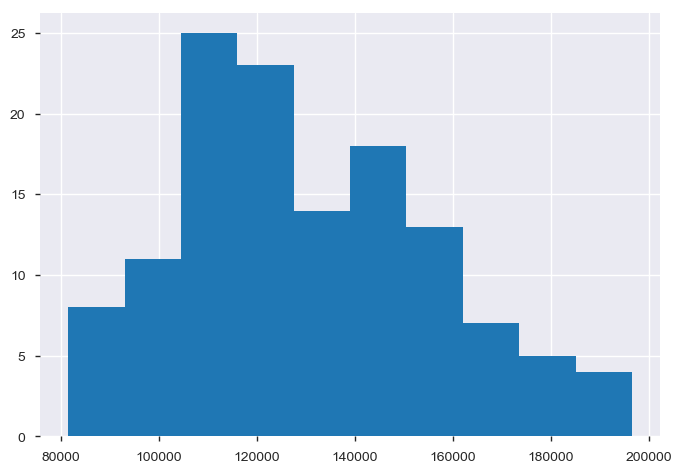

In [35]:
HouseP_new.Price.hist()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


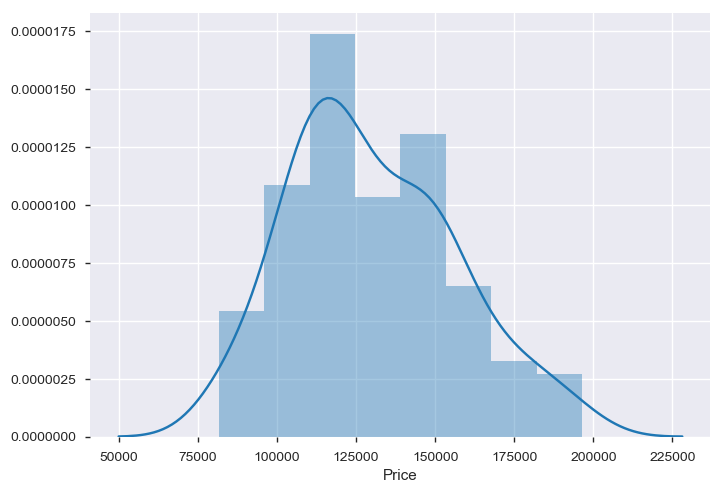

In [36]:
# exploring data
# Distribution of variables
import seaborn as sns
sns.distplot(HouseP_new.Price)

In [38]:
HouseP_new["ln_price"]= np.log(HouseP_new["Price"])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


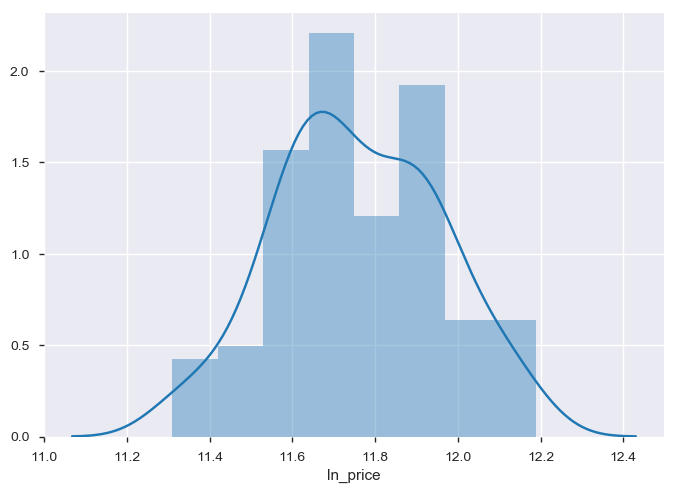

In [39]:
# exploring data
# Distribution of variables
import seaborn as sns
sns.distplot(HouseP_new.ln_price)

In [40]:
HouseP_new = HouseP_new.drop(columns=['ln_price'])

In [41]:
HouseP_new.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,2.27,114300.0,1790.0,2.0,2.0,2.0,0,0,0
1,2.27,114200.0,2030.0,4.0,2.0,3.0,0,0,0
2,3.00,114800.0,1740.0,3.0,2.0,1.0,0,0,0
3,4.00,94700.0,1980.0,3.0,2.0,3.0,0,0,0
4,5.00,119800.0,2130.0,3.0,3.0,3.0,0,0,0


In [42]:
corrm=HouseP_new.corr()

In [48]:
HouseP_new.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,2.27,114300.0,1790.0,2.0,2.0,2.0,0,0,0
1,2.27,114200.0,2030.0,4.0,2.0,3.0,0,0,0
2,3.00,114800.0,1740.0,3.0,2.0,1.0,0,0,0
3,4.00,94700.0,1980.0,3.0,2.0,3.0,0,0,0
4,5.00,119800.0,2130.0,3.0,3.0,3.0,0,0,0


In [45]:
corrm.to_csv('House_sum.csv')

In [53]:
HouseP_new

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,2.27,114300.0,1790.0,2.00,2.0,2.0,0,0,0
1,2.27,114200.0,2030.0,4.00,2.0,3.0,0,0,0
2,3.00,114800.0,1740.0,3.00,2.0,1.0,0,0,0
3,4.00,94700.0,1980.0,3.00,2.0,3.0,0,0,0
4,5.00,119800.0,2130.0,3.00,3.0,3.0,0,0,0
5,6.00,114600.0,1780.0,3.00,2.0,2.0,0,1,0
6,7.00,151600.0,1830.0,3.00,3.0,3.0,1,0,1
7,8.00,150700.0,2160.0,4.00,2.0,2.0,0,0,1
8,9.00,119200.0,2110.0,4.00,2.0,3.0,0,0,0
9,10.00,104000.0,1730.0,3.00,3.0,3.0,0,0,0


In [57]:
HouseP_new[['SqFt','Bedrooms','Bathrooms','Offers','Brick_Yes','Neighborhood_North','Neighborhood_West']]

,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1790.0,2.00,2.0,2.0,0,0,0
1,2030.0,4.00,2.0,3.0,0,0,0
2,1740.0,3.00,2.0,1.0,0,0,0
3,1980.0,3.00,2.0,3.0,0,0,0
4,2130.0,3.00,3.0,3.0,0,0,0
5,1780.0,3.00,2.0,2.0,0,1,0
6,1830.0,3.00,3.0,3.0,1,0,1
7,2160.0,4.00,2.0,2.0,0,0,1
8,2110.0,4.00,2.0,3.0,0,0,0
9,1730.0,3.00,3.0,3.0,0,0,0


In [58]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( HouseP_new[['SqFt','Bedrooms','Bathrooms','Offers','Brick_Yes','Neighborhood_North','Neighborhood_West']],
                                                  HouseP_new['Price'],
                                                  test_size = 0.3,
                                                  random_state = 1234 )

In [59]:
print(len( train_X ))
print(len( test_X))

89
39


In [60]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split( HouseP_new,test_size = 0.3,random_state = 1234 )

In [61]:
### Building a linear regression model
import statsmodels.formula.api as smf

In [63]:
lm=smf.ols('Price~SqFt+Bedrooms+Bathrooms+Offers+Brick_Yes+Neighborhood_North+Neighborhood_West', train).fit()

In [77]:
test['pred_sales'] = (lm.predict(test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
test.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,pred_sales
51,52.0,91100.0,1860.0,2.0,2.0,3.0,0,1,0,101024.562683
59,60.0,155400.0,2090.0,4.0,2.0,1.0,0,0,1,157672.236578
85,86.0,188300.0,2250.0,4.0,3.0,2.0,1,0,1,182979.397449
77,78.0,176500.0,2280.0,4.0,3.0,3.0,1,0,1,177285.424976
35,36.0,117100.0,2080.0,3.0,3.0,3.0,0,1,0,125269.221379


In [64]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     71.15
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           6.13e-32
Time:                        15:26:47   Log-Likelihood:                -938.46
No. Observations:                  89   AIC:                             1893.
Df Residuals:                      81   BIC:                             1913.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -640.0475   1.18

In [65]:
train['pred_sales'] = (lm.predict(train))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
train.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,pred_sales
86,87.0,102700.0,1900.0,4.0,2.0,4.0,0,1,0,106703.727342
97,98.0,126800.0,2000.0,2.0,2.0,1.0,1,0,0,137784.886644
89,90.0,97800.0,2010.0,2.0,2.0,4.0,0,1,0,101511.633877
20,21.0,116200.0,1790.0,3.0,2.0,3.0,0,0,0,101097.336051
118,119.0,150200.0,1950.0,3.0,2.0,3.0,1,1,0,127910.652990


In [69]:
# accuracy metrics
Mape_train=np.mean(np.abs(train['Price'] - train['pred_sales'])/train['Price'])
#Mape_test=np.mean(np.abs(test['Price'] - test['pred_sales'])/test['Price'])
print(Mape_train)
#print(Mape_test)

0.05840900392054987


In [70]:
test['pred_sales'] = (lm.predict(test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
Mape_test=np.mean(np.abs(test['Price'] - test['pred_sales'])/test['Price'])
print(Mape_test)

0.06763531882215022


In [72]:
corr_train =np.corrcoef(train['Price'],train['pred_sales'])[1][0]

In [74]:
corr_test =np.corrcoef(test['Price'],test['pred_sales'])[1][0]

In [75]:
print(corr_test);print(corr_train)

0.9416806757669209
0.927424319529844


In [79]:
lm=smf.ols('Price~SqFt+Bedrooms+Bathrooms+Brick_Yes+Neighborhood_North+Neighborhood_West', train).fit()

In [80]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     53.74
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           2.24e-26
Time:                        16:14:56   Log-Likelihood:                -954.98
No. Observations:                  89   AIC:                             1924.
Df Residuals:                      82   BIC:                             1941.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            2.39e+04   1.32

In [81]:
lm=smf.ols('Price~SqFt+Bedrooms+Bathrooms+Offers+Brick_Yes+Neighborhood_West', train).fit()

In [82]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     83.59
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           7.67e-33
Time:                        16:45:47   Log-Likelihood:                -938.66
No. Observations:                  89   AIC:                             1891.
Df Residuals:                      82   BIC:                             1909.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2907.7781   1.02e+0